<center><h1>Singh_Vasundhara_HW5</h1></center>
<br>
<br>

Name: Vasundhara Singh
<br>
Github Username: vasu1406
<br>
USC ID: 7421414643

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from pathlib import Path
from sklearn.tree import plot_tree
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeClassifier as DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV as gsCV
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import xgboost
from itertools import chain
import re
import statsmodels.api as sm

### (a) Obtain Data

Get the Accute Inamations Data Set

In [55]:
columnNames = ['Temperature','Nausea','Lumbar pain','Urine Pushing','Micturition','Urethra Issues','Inflammation','Nephritis']

In [56]:
file_path = Path('../data/diagnosis.data')
data = pd.read_csv(file_path, encoding='utf-16', sep='\t', names=columnNames)
data['Temperature'] = data['Temperature'].map(lambda x: float(str(x).replace(',', '.')))
data

,Temperature,Nausea,Lumbar pain,Urine Pushing,Micturition,Urethra Issues,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [57]:

columns = ['Nausea','Lumbar pain','Urine Pushing','Micturition','Urethra Issues']
label_encoder = pre.LabelEncoder()

for column in columns:
    data[column] = label_encoder.fit_transform(data[column])
    
data    

,Temperature,Nausea,Lumbar pain,Urine Pushing,Micturition,Urethra Issues,Inflammation,Nephritis
0,35.5,0,1,0,0,0,no,no
1,35.9,0,0,1,1,1,yes,no
2,35.9,0,1,0,0,0,no,no
3,36.0,0,0,1,1,1,yes,no
4,36.0,0,1,0,0,0,no,no
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,no,yes
116,41.5,0,0,0,0,0,no,no
117,41.5,1,1,0,1,0,no,yes
118,41.5,0,1,1,0,1,no,yes


### (b) Build a decision tree

In [58]:
decisionTree = DecisionTreeClassifier()
attributes = data.iloc[:,0:-2]
target = data.iloc[:,-2:]

decisionTree.fit(attributes,target)

DecisionTreeClassifier()

In [59]:
target

,Inflammation,Nephritis
0,no,no
1,yes,no
2,no,no
3,yes,no
4,no,no
...,...,...
115,no,yes
116,no,no
117,no,yes
118,no,yes


In [60]:
matplotlib.rcParams['figure.figsize'] = (25, 10)
# data.columns

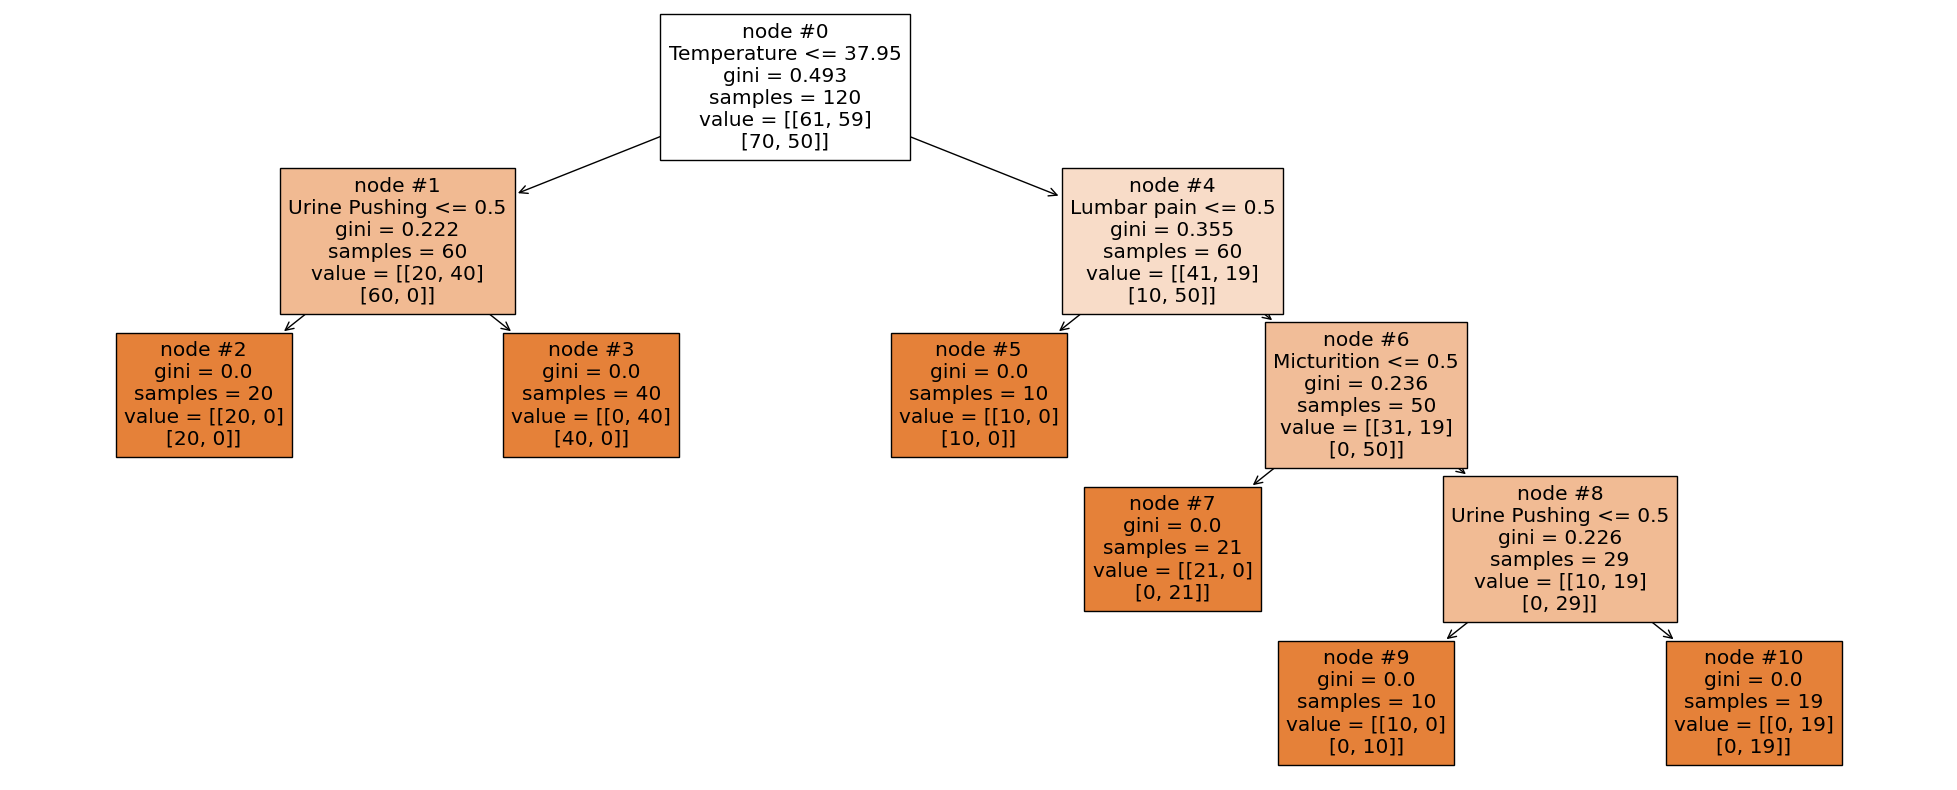

In [61]:
plot_tree(decisionTree,feature_names = data.columns,filled = True,node_ids=True)
# plot_tree(decisionTree, feature_names=data.columns, filled=True, 
#           class_names=['Negative', 'Positive'], 
#           rounded=True, fontsize=14, 
#           impurity=True, 
#           proportion=True, 
#           node_ids=True)
plt.show()

### (c) Convert the decision rules

In [62]:
def recursiveFunction(left, right, threshold, features, node, depth, indent,value):
    ifThenElseStatements = ""
    if (threshold[node] != -2):
        ifThenElseStatements += f"{indent}if ({features[node]} <= {threshold[node]}) {{\n"
        if left[node] != -1:
            ifThenElseStatements += recursiveFunction(left, right, threshold, features, left[node], depth+1, indent + "  ",value)
            ifThenElseStatements += f"{indent}}} else {{\n"
            if right[node] != -1:
                ifThenElseStatements += recursiveFunction(left, right, threshold, features, right[node], depth+1, indent + "  ",value)
            ifThenElseStatements += f"{indent}}}\n"
    else:
        value_str = re.sub(r'\.', ',', str(value[node]))
        ifThenElseStatements = f"{indent}return {value_str}\n"
    
#         ifThenElseStatements = f"{indent}return {value[node]}\n"
        
    return ifThenElseStatements

In [63]:
def treeToIfElse(recurse_func,tree,featureNames):
    children_left, children_right, threshold = tree.tree_.children_left, tree.tree_.children_right, tree.tree_.threshold
    value = tree.tree_.value
    features = list(map(featureNames.__getitem__, tree.tree_.feature))
    
    ifElseStatements = recursiveFunction(children_left, children_right, threshold, features, 0, 0, "",value)
    
    return ifElseStatements

In [64]:
ifElseStatements = treeToIfElse(recursiveFunction, decisionTree, data.columns)
print(ifElseStatements)

if (Temperature <= 37.95000076293945) {
  if (Urine Pushing <= 0.5) {
    return [[20,  0,]
 [20,  0,]]
  } else {
    return [[ 0, 40,]
 [40,  0,]]
  }
} else {
  if (Lumbar pain <= 0.5) {
    return [[10,  0,]
 [10,  0,]]
  } else {
    if (Micturition <= 0.5) {
      return [[21,  0,]
 [ 0, 21,]]
    } else {
      if (Urine Pushing <= 0.5) {
        return [[10,  0,]
 [ 0, 10,]]
      } else {
        return [[ 0, 19,]
 [ 0, 19,]]
      }
    }
  }
}



### (d) Cost Complexity Pruning

In [65]:
#Cost complexity pruning
ccp_path = decisionTree.cost_complexity_pruning_path(attributes, target)
costComplexityPruningAlphas = ccp_path['ccp_alphas']
costComplexityPruningAlphas

array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611])

In [66]:

alpha_dict = {'ccp_alpha':costComplexityPruningAlphas}
for column in target.columns:
    target[column] = label_encoder.fit_transform(target[column])
target

,Inflammation,Nephritis
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
115,0,1
116,0,0
117,0,1
118,0,1


In [67]:
gridSearchCV = gsCV(DecisionTreeClassifier(), alpha_dict, cv=5, n_jobs = -1)
gridSearchCV.fit(attributes,target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611])})

In [68]:
display(gridSearchCV.cv_results_)

{'mean_fit_time': array([0.00677757, 0.0076046 , 0.00639834, 0.00640678, 0.00618353]),
 'std_fit_time': array([0.00130975, 0.00185791, 0.00048841, 0.00048698, 0.00099122]),
 'mean_score_time': array([0.00462146, 0.00580015, 0.00419946, 0.00406394, 0.00356317]),
 'std_score_time': array([0.0008105 , 0.00240148, 0.00040284, 0.0001209 , 0.00052523]),
 'param_ccp_alpha': masked_array(data=[0.0, 0.04908333333333333, 0.07947222222222226,
                    0.1111111111111111, 0.204236111111111],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'ccp_alpha': 0.0},
  {'ccp_alpha': 0.04908333333333333},
  {'ccp_alpha': 0.07947222222222226},
  {'ccp_alpha': 0.1111111111111111},
  {'ccp_alpha': 0.204236111111111}],
 'split0_test_score': array([1.        , 1.        , 1.        , 0.54166667, 0.54166667]),
 'split1_test_score': array([1.  , 1.  , 1.  , 0.75, 0.  ]),
 'split2_test_score': array([0.75      , 0.66666667, 0.6666666

In [69]:
print(gridSearchCV.best_params_)

{'ccp_alpha': 0.0}


In [70]:
prunedTreeClassifier = DecisionTreeClassifier(ccp_alpha = gridSearchCV.best_params_['ccp_alpha'])
prunedTreeClassifier.fit(attributes,target)

DecisionTreeClassifier()

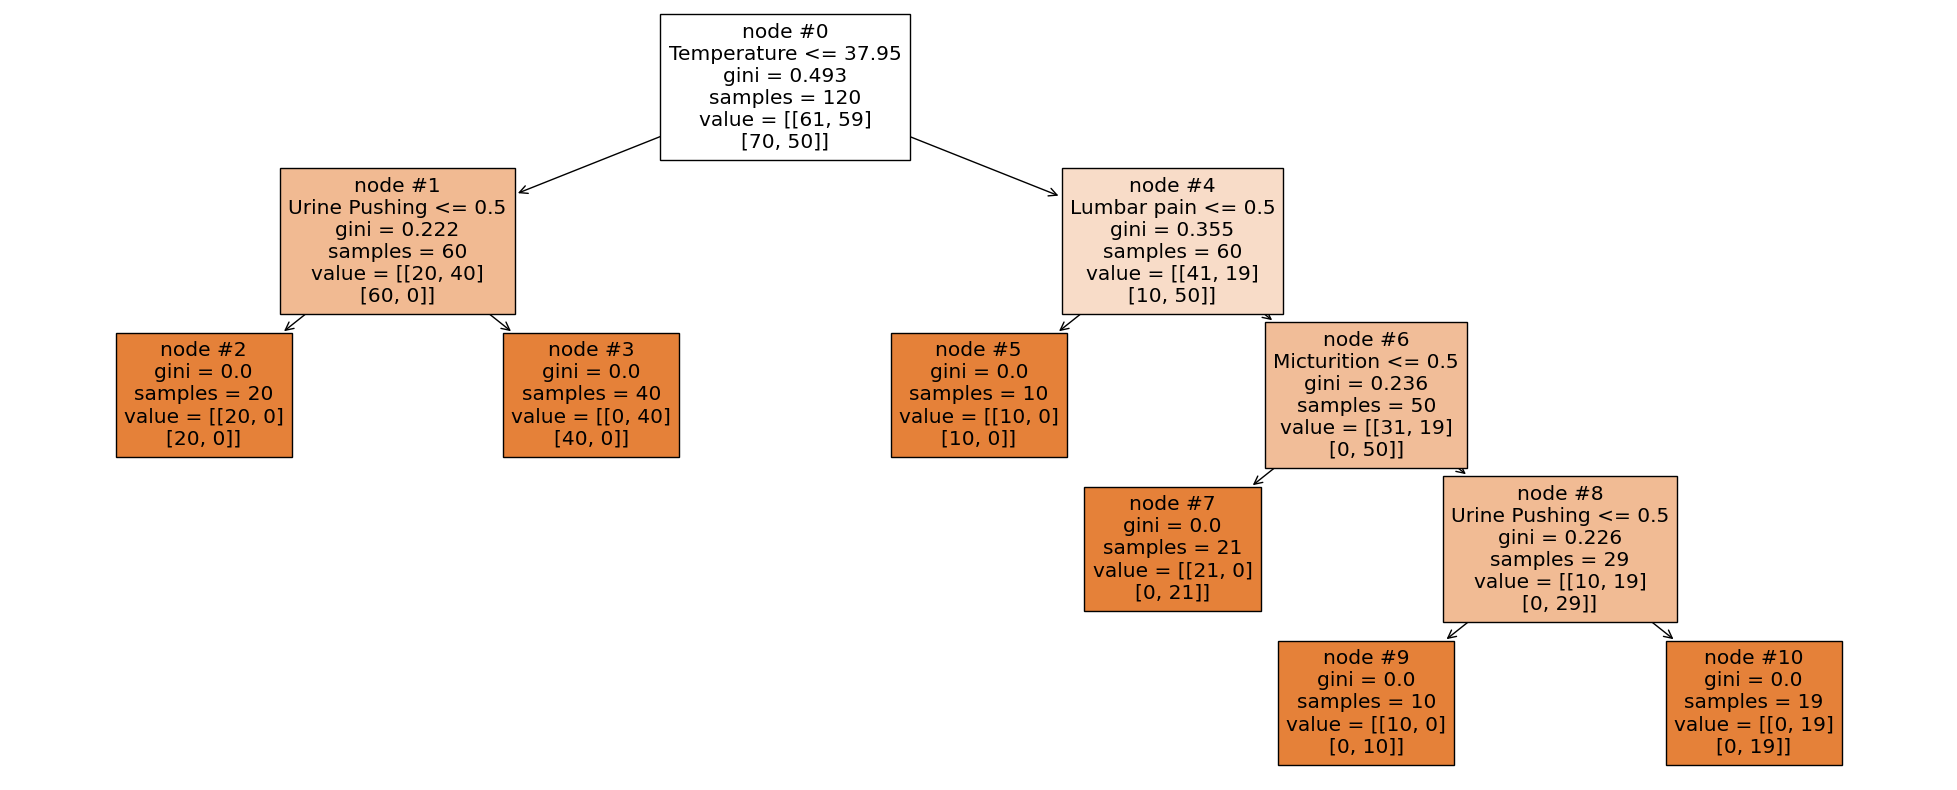

In [71]:
matplotlib.rcParams['figure.figsize'] = (25, 10)
# data.columns
# plot_tree(decisionTree,feature_names = data.columns,filled=True)
plot_tree(prunedTreeClassifier, feature_names = data.columns, filled=True, 
#           class_names=['Negative', 'Positive'], 
#           rounded=True, fontsize=14, 
#           impurity=True, 
#           proportion=True, 
          node_ids=True)
plt.show()

In [72]:
ifElseStatementsPruned = treeToIfElse(recursiveFunction, prunedTreeClassifier, data.columns)
print(ifElseStatementsPruned)

if (Temperature <= 37.95000076293945) {
  if (Urine Pushing <= 0.5) {
    return [[20,  0,]
 [20,  0,]]
  } else {
    return [[ 0, 40,]
 [40,  0,]]
  }
} else {
  if (Lumbar pain <= 0.5) {
    return [[10,  0,]
 [10,  0,]]
  } else {
    if (Micturition <= 0.5) {
      return [[21,  0,]
 [ 0, 21,]]
    } else {
      if (Urine Pushing <= 0.5) {
        return [[10,  0,]
 [ 0, 10,]]
      } else {
        return [[ 0, 19,]
 [ 0, 19,]]
      }
    }
  }
}



## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [21]:
communtitesColumns=[]
with open('../data/communities.names') as f:
    communtitesColumns = [line.split()[1] for line in f if '@attribute' in line]

len(communtitesColumns)

128

In [22]:
communitiesData = pd.read_csv('../data/communities.data',names=communtitesColumns)
communitiesData 

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


### (b) Missing values

In [23]:
communitiesData = communitiesData.applymap(lambda x: np.nan if x == '?' else x)
communitiesData

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


**I have used Mean to replace the missing values by SimpleImputer. As mean is a very safe replacement and works well with most of the datasets. SimpleImputer is very easy to use and implement.It simply replaces the missing values with some constant values like mean, median etc.**

In [24]:
imputeData = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [25]:
#New code
communitiesData = pd.read_csv('../data/communities.data',names=communtitesColumns)
communitiesData = communitiesData.applymap(lambda x: np.nan if x == '?' else x)
# communitiesData
newCompleteData = communitiesData.iloc[:,5:]
# newCompleteData
# trainData = newCompleteData[:1495]
# testData = newCompleteData[1495:]
trainData = newCompleteData.iloc[:1495, :]
testData = newCompleteData.iloc[1495:]

imputedCommunitiesData = imputeData.fit_transform(trainData)
trainData = imputedCommunitiesData
testData = imputeData.transform(testData)

trainData = pd.DataFrame(trainData, columns=newCompleteData.columns)
testData = pd.DataFrame(testData, columns=newCompleteData.columns)
#Imputed Train Data
trainData


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03


In [26]:
#Imputed test Data
testData

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


In [27]:
#Concatednated Imputed Data
newCompleteData = pd.concat([trainData, testData])
newCompleteData[newCompleteData.select_dtypes(include=['object']).columns] = newCompleteData.select_dtypes(include=['object']).astype('float')
newCompleteData

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


### (c) Plot a correlation matrix

In [28]:
# New
newCompleteDataExceptY = newCompleteData.iloc[:, :-1]
correlation = newCompleteDataExceptY.corr()
correlation.style.background_gradient(cmap='viridis')

### (d) Calculate the Coefficient of Variation CV

In [29]:
def printColumnCV(columnsCV):
    for column in columnsCV.index:
        print(column,'=',columnsCV[column])

In [30]:
#New code

columnsCV = newCompleteData.iloc[:,:-1].apply(lambda x: np.std(x, ddof=1) / np.mean(x) * 100, axis=0)
printColumnCV(columnsCV)

population = 220.3502536390972
householdsize = 35.32983018683109
racepctblack = 141.09203963756863
racePctWhite = 32.37815624993411
racePctAsian = 135.91621938222073
racePctHisp = 161.4277791710685
agePct12t21 = 36.5839868839724
agePct12t29 = 29.069288841904147
agePct16t24 = 49.51605143654288
agePct65up = 42.344170889026195
numbUrban = 200.17436381957677
pctUrban = 63.88488712113656
medIncome = 57.97533935755996
pctWWage = 32.77100586060616
pctWFarmSelf = 70.00301156104908
pctWInvInc = 35.923994722340616
pctWSocSec = 36.85126303254015
pctWPubAsst = 69.9030504203365
pctWRetire = 34.963908285758485
medFamInc = 52.773188534207904
perCapInc = 54.5633428419145
whitePerCap = 50.75521907214038
blackPerCap = 58.94690036844645
indianPerCap = 80.96850868666168
AsianPerCap = 60.61938508790911
OtherPerCap = 67.06480702030862
HispPerCap = 47.395971860747885
NumUnderPov = 230.4969714852185
PctPopUnderPov = 75.39801744357952
PctLess9thGrade = 67.56002166771717
PctNotHSGrad = 52.82862664983298
PctBSor

### (e) Scatter plots and box plots for highest CV features

In [31]:
hightoLowColumnsCV = columnsCV.sort_values(ascending=False)
highestCVfeaturesNumber = math.floor(math.sqrt(128))
highestCVColumns = hightoLowColumnsCV.index[0:highestCVfeaturesNumber]
highestCVColumns

Index(['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig',
       'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban',
       'HousVacant', 'LandArea', 'racePctHisp'],
      dtype='object')

**We cannot draw concrete conclusions about the significance of the features just by having a look at the scatterplots. It surely shows some correlation between features, however we can't judge the nature and extent of correlation just by data visualisation.**

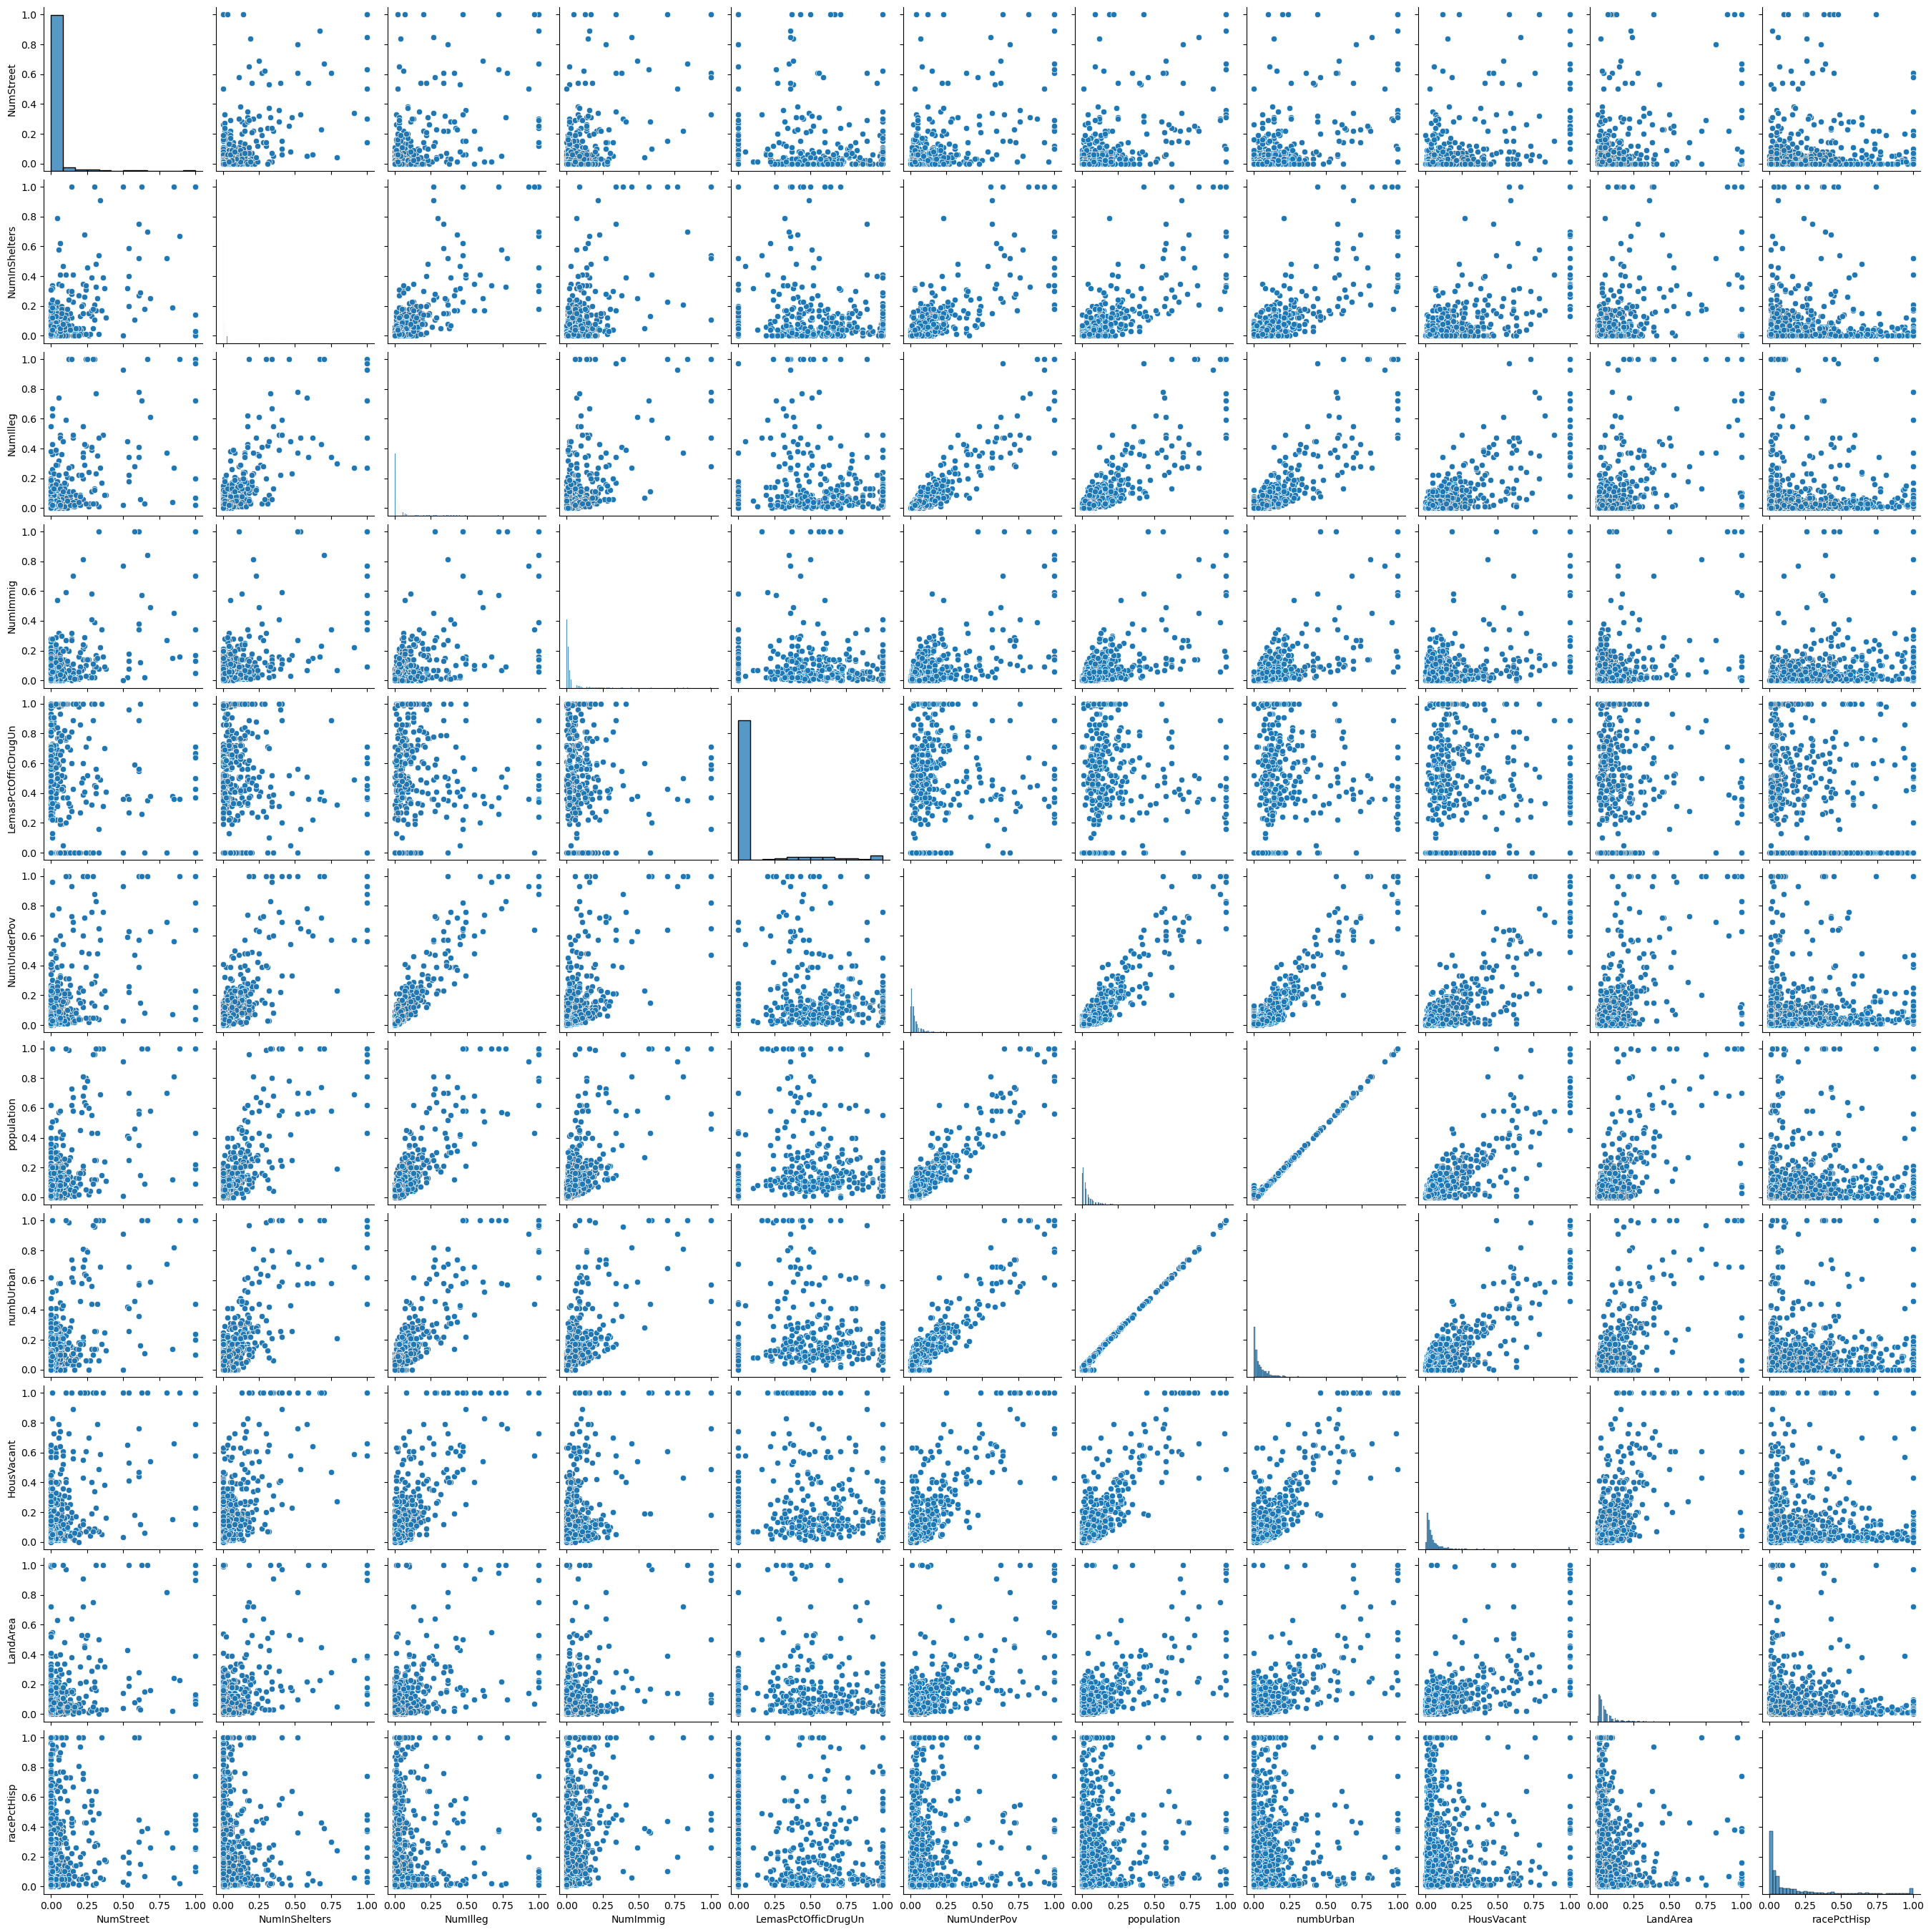

In [32]:
#New
sns.pairplot(newCompleteData[highestCVColumns].reset_index(drop=True))

<AxesSubplot:>

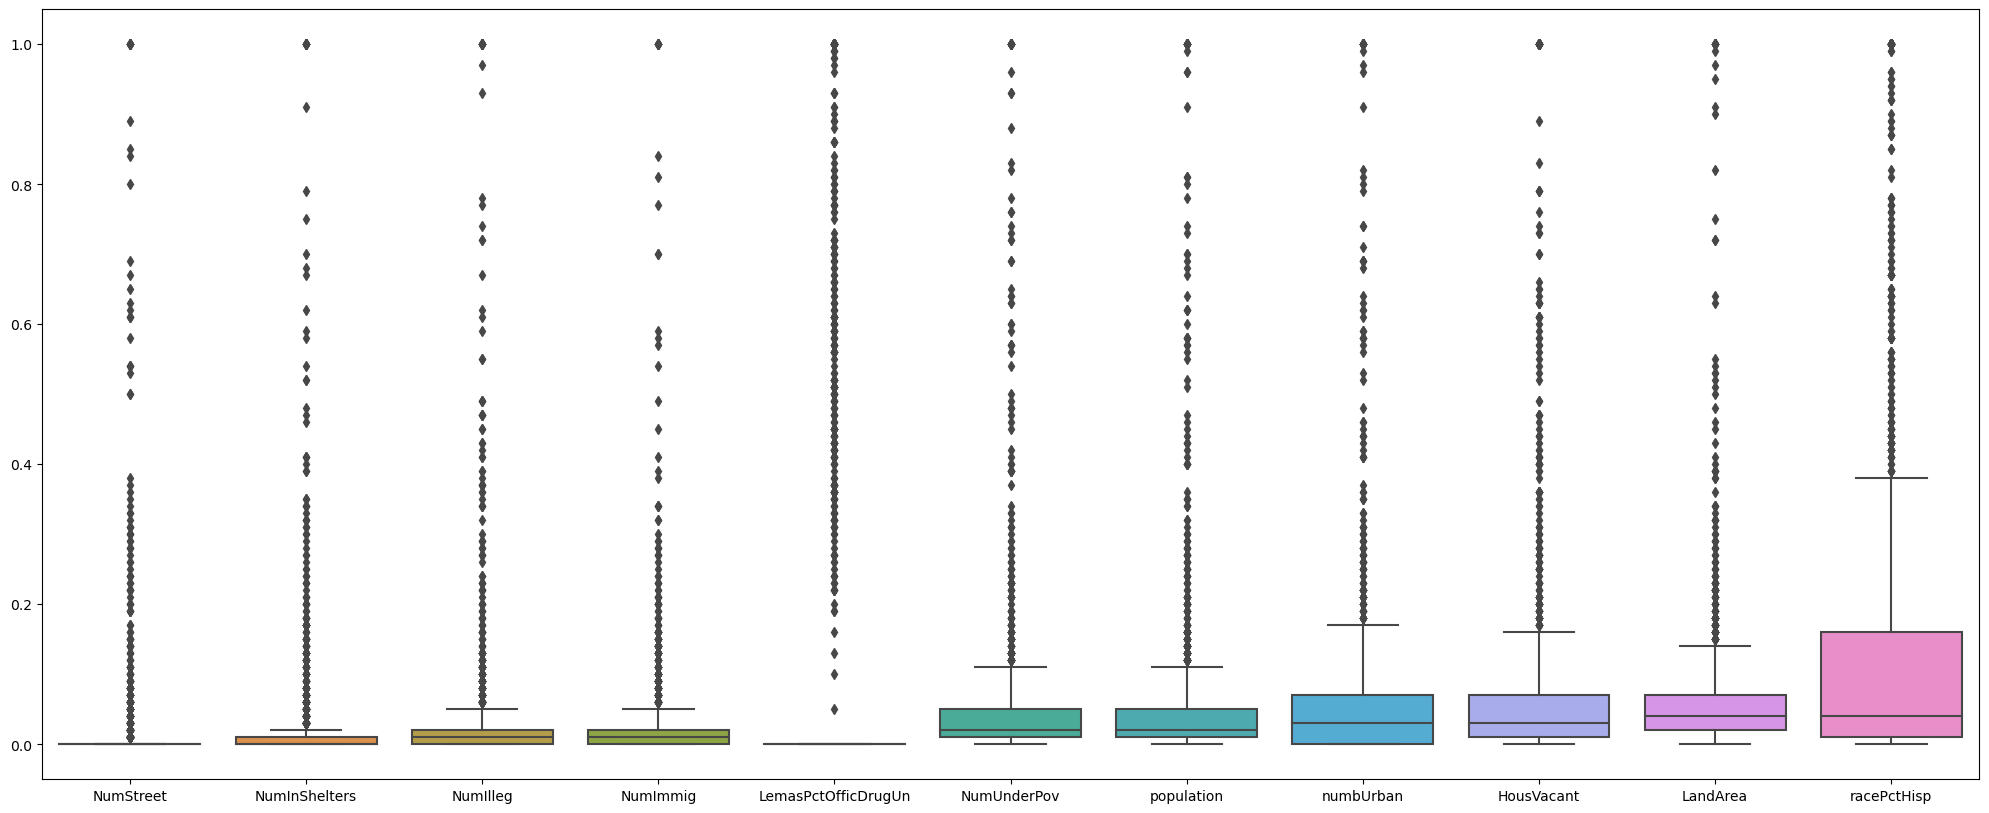

In [33]:
matplotlib.rcParams['figure.figsize'] = (25, 10)
#New code
sns.boxplot(data = newCompleteData[highestCVColumns].reset_index(drop=True))

### (f) Fit a linear model

In [34]:
#newCode
predictors = newCompleteData.iloc[:,:-1]
target = newCompleteData['ViolentCrimesPerPop']
trainingX = predictors[:1495]
testX = predictors[1495:]
trainingY = target[:1495]
testY = target[1495:]

In [35]:
def calculateMSE(model,trainingX,trainingY,testX,testY):
    model = model.fit(trainingX,trainingY)
    predictedY = model.predict(testX)
    mseTest = mse(testY,predictedY)
    return mseTest

In [36]:
#New code 
model = sm.OLS(trainingY, trainingX)
model = model.fit()
predictedY = model.predict(testX)
mseTest = mse(testY,predictedY)
# mseLP = calculateMSE(model,trainingX,trainingY,testX,testY)
print('Min Squared error for Test Data for Linear Regression Model =', mseTest)

Min Squared error for Test Data for Linear Regression Model = 0.018223580558593088


### (g) Fit a ridge regression model

In [37]:
ridgeModel = RidgeCV()
mseTestRidge = calculateMSE(ridgeModel,trainingX,trainingY,testX,testY)
print('Min Squared error for Test Data for Ridge Model =', mseTestRidge)

Min Squared error for Test Data for Ridge Model = 0.01773247499289544


### (h) Fit a LASSO model

**The Non-Standardised Test MSE is 0.017758209216319678 whereas the test mse after standardising is 0.017805339276862262 which is slightly worse than the previous one. Standardisation here didn't work in favour of us.**

In [73]:
modelLasso = LassoCV(max_iter=1500)
mseTestLasso = calculateMSE(modelLasso,trainingX,trainingY,testX,testY)
print('Min Squared error for Test Data for Lasso mdel =', mseTestLasso)

coefficients_selected = [(col, coef) for col, coef in zip(predictors.columns, modelLasso.coef_) if coef != 0]
# print('Number of Columns Selected:', len(coefficients_selected))

print('Coefficients Selected:')
_ = [print(col, ':', coef) for col, coef in zip(predictors.columns, modelLasso.coef_) if coef != 0]


Min Squared error for Test Data for Lasso mdel = 0.017758209216319678
Coefficients Selected:
racepctblack : 0.2719838394913766
racePctAsian : -0.015670755006932137
agePct12t21 : 0.06665769793753054
agePct12t29 : -0.2653725320216031
pctUrban : 0.04051248428346879
pctWWage : -0.08481131931030432
pctWFarmSelf : 0.026606940505155004
pctWInvInc : -0.09851161040553223
pctWSocSec : 0.048560228618083026
pctWPubAsst : 0.038868068770570995
pctWRetire : -0.10843092574592718
whitePerCap : -0.05801919823410237
blackPerCap : -0.021055964454673226
indianPerCap : -0.031130872292690116
AsianPerCap : 0.02900206869300263
OtherPerCap : 0.02269290943831045
HispPerCap : 0.023950026546233055
PctPopUnderPov : -0.14118797801862507
PctLess9thGrade : -0.01835353622520121
PctEmploy : 0.13739396691277003
PctEmplManu : -0.01567272085741402
PctOccupManu : 0.01010228133994619
MalePctDivorce : 0.11806911558983245
MalePctNevMarr : 0.1331724196945888
FemalePctDiv : -0.07861242138392266
PctKids2Par : -0.19660028636990748

In [39]:
standard_scaler = StandardScaler()

def calculateMSEStandardised(model,trainingX,trainingY,testX,testY):
    standardisedTrainingX = standard_scaler.fit_transform(trainingX)
    standardisedTestX = standard_scaler.transform(testX)
    model = model.fit(standardisedTrainingX,trainingY)
    predictedY = model.predict(standardisedTestX)
    mseTest = mse(testY,predictedY)
    return mseTest

In [74]:
modelLasso = LassoCV(max_iter=1500)

# standardisedTrainingX = standard_scaler.fit_transform(trainingX)
mseTestLassoStandardised = calculateMSEStandardised(modelLasso,trainingX,trainingY,testX,testY)
print('Min Squared error for Test Data for Lasso model Standardised =', mseTestLassoStandardised)

coefficients_selected = [(col, coef) for col, coef in zip(predictors.columns, modelLasso.coef_) if coef != 0]
# print('Number of Columns Selected:', len(coefficients_selected))

print('Coefficients Selected:')
_ = [print(col, ':', coef) for col, coef in zip(predictors.columns, modelLasso.coef_) if coef != 0]

Min Squared error for Test Data for Lasso model Standardised = 0.017805339276862262
Coefficients Selected:
racepctblack : 0.06824777647738174
racePctAsian : -0.0009073459639330002
agePct12t21 : 0.010367292233691533
agePct12t29 : -0.03825319013618473
pctUrban : 0.016588463765336337
pctWWage : -0.012059262422046057
pctWFarmSelf : 0.004099963818669616
pctWInvInc : -0.020836456765296767
pctWSocSec : 0.008883850234873118
pctWPubAsst : 0.00613534052896377
pctWRetire : -0.017181051312876967
whitePerCap : -0.008624357017773417
blackPerCap : -0.003639378078642818
indianPerCap : -0.005237485787812745
AsianPerCap : 0.005306365445112989
OtherPerCap : 0.0038164347292070216
HispPerCap : 0.003991588556162732
PctPopUnderPov : -0.026742189525748073
PctLess9thGrade : -0.0020475969582087364
PctEmploy : 0.021189849220710703
PctEmplManu : -0.0010416241324929412
MalePctDivorce : 0.018976386789924585
MalePctNevMarr : 0.020713651693559165
FemalePctDiv : -0.010065959072219927
PctKids2Par : -0.03980630170096821

### (i) Fit a PCR model

In [82]:
bestM = 1
bestScore = 0
n= len(trainingX.columns)
for i in range(1,n):
    p = make_pipeline( PCA(n_components = i), LinearRegression())
    cv_scores = cross_val_score(p, trainingX, trainingY, cv = 5 )
    if cv_scores.mean() > bestScore:
        bestM = i
        bestScore = cv_scores.mean()
print('Best Score',':',bestScore)
print('Best M',':',bestM)

Best Score : 0.6566130240615872
Best M : 96


In [83]:
standard_scaler = StandardScaler()
p = make_pipeline(standard_scaler, PCA(n_components = bestM), LinearRegression())
mseTestPCR  = calculateMSE(p,trainingX,trainingY,testX,testY)

print('Min Squared error for Test Data for PCR model =', mseTestPCR)

Min Squared error for Test Data for PCR model = 0.01842203525881694


### (j) Fit a boosting tree

In [84]:
# The range for choosing alphas is from 10^-4 to 10^4 and 0.25,0.5....10

alpha_list = list(chain([10**i for i in range(-4, 4)], [i/100 for i in range(25, 1000, 25)]))
alpha_dict = {'reg_alpha':alpha_list}

gridSearchCV = gsCV(xgboost.XGBRegressor(), alpha_dict)
gridSearchCV.fit(trainingX,trainingY)

display(gridSearchCV.best_params_)

{'reg_alpha': 3.5}

In [85]:
regAlphaBest = gridSearchCV.best_params_['reg_alpha']
xgboostBestRegressor = xgboost.XGBRegressor(reg_alpha = regAlphaBest)

mseTestXGBoost  = calculateMSE(xgboostBestRegressor,trainingX,trainingY,testX,testY)

print('Min Squared error for Test Data for XGBoost model =', mseTestXGBoost)

Min Squared error for Test Data for XGBoost model = 0.017929432437724074
